<table style="width:100%">
  <tr>
    <th align="right"><img src="img/dilogo.png" style="float:left;height:90px"></th>
    <th align="center">
    <h1 align="center">Laboratorio 4</h1>
    <h2 align="center">Profesor: Ricardo Ñanculef</h2>
    <h3 align="center">Ayudante: Gabriel Ortega</h3>
    <h3 align="center">Ignacio Aedo;201773556-2;Malla Nueva</h3>
    <h3 align="center">Ethiel Carmona;201773533-3;Malla Nueva</h3>
    <h3 align="center">Julio 2019</h3>
    </th> 
    <th align="left"><img src="img/usmlogo.png" style="float:right;height:85px"></th>
  </tr>

## Instrucciones

La modalidad de trabajo será mediante el uso de jupyter notebook. El notebook debe ser desarrollado en parejas o individual. Este laboratorio debe ser entregado el día *cuando se baje el paro hay fecha*.

La **modalidad de entrega será un archivo Apellido1_Apellido2_Lab4.zip** que contenga un notebook que incluya todas las preguntas con sus respectivas respuestas + un README que indique la forma correcta de ejecutar su notebook. El laboratorio puede ser trabajado tanto en lenguaje R como en lenguaje python (para los que usen python 2.X, absténganse a las consecuencias). Lea bien el enunciado.


**Cualquier copia detectada implicará nota 0 en el laboratorio correspondiente y se notificará la situación al profesor.**

## Consideración

>En este laboratorio se evaluará el uso correcto de una semilla para replicar sus ejecuciones y observar los mismos resultados, el no cumplimiento de esto implica un descuento de 10 puntos en su nota.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from scipy import stats
from scipy.stats import expon
from scipy.stats import exponweib
import math
import csv
from sklearn import linear_model
from sklearn.model_selection import train_test_split

## 1. Test de Hipótesis (25p)

Muchos procesos estadísticos utilizados asumen la normalidad de los datos para poder trabajar, la normalidad de los datos simplifica el trabajo en muchos casos, pero, ¿es posible asumir siempre esta normalidad?, como la respuesta es claramente "no" en esta sección trabajará el [Test de hipótesis de Shapiro-Wilks](http://riotorto.users.sourceforge.net/R/noparam_shapiro/) cuya utilidad es poder determinar si un conjunto de datos sigue una distribución normal o no. (Queda propuesto para el estudiante investigar más sobre este test)

Recordando el trabajo realizado en el laboratorio anterior, respecto al teorema del límite central, utilizaremos la misma distribución dada para trabajar con este test de hipótesis 

| Valor | Probabilidad |
|:-----:|:------------:|
|   1   |      0.1     |
|   2   |      0.2     |
|   5   |     0.05     |
|   6   |     0.05     |
|   7   |      0.2     |
|   9   |     0.10     |
|   10  |     0.05     |
|   11  |     0.2      |
|   12  |     0.05     |

Se trabajará con 3 muestras:

* Una muestra de tamaño 1000 de la población original (distribución dada)
* La distribución de 1000 medias de muestras de tamaño 12 
* La distribución de 1000 medias de muestras de tamaño 120

>a) A priori ¿Qué muestra/s esperaría usted que siguieran una distribución normal? ¿Cuáles no? Responda utilizando el teorema del límite central. (Independiente de lo que obtenga en b), el puntaje se dará según la justificación que se de)

El teorema del límite central establece que si calculamos una gran cantidad de veces la media muestral de una población que sigue una distribución normal con valor esperado $\mu$ y varianza finita $\sigma^{2}$, se obtendrá que sigue una distribución normal con valor esperado y varianza igual a: $ \mu,\sqrt{\frac{\sigma^{2}}{n}}$ ,respectivamente.
Basándose en esta definición, se espera que ambas distribuciones de 1000 medias de muestras 12 y 120 sigan una distribución normal, donde la muestra de mayor tamaño será más precisa debido a la mayor representatividad. Se espera que la muestra de tamaño 1000 de la población original no siga una distribución normal ya que no cumple con los requisitos del teorema.

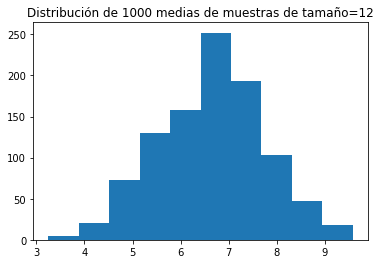

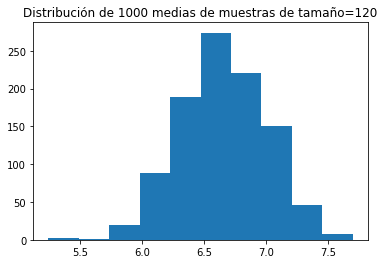

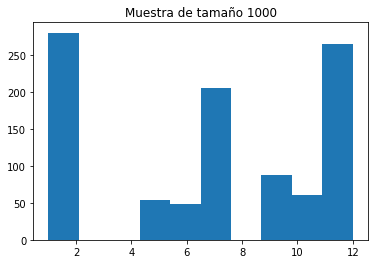

In [11]:
muestra1=[]
muestra2=[]
muestra3=[]
promedio=(1+2+5+6+7+9+10+11+12)/9
valorEsperado= 1*0.1+2*0.2+5*0.05+6*0.05+7*0.2+9*0.1+10*0.05+11*0.2+12*0.05
varianza=1*0.1+4*0.2+25*0.05+36*0.05+49*0.2+81*0.1+100*0.05+121*0.2+144*0.05 - valorEsperado**2
valores=[1,2,5,6,7,9,10,11,12]
enes=[12,120]
random.seed(1)
for n in enes:
    promedioP1000=[]
    p=0
    while(p<1000):
        lista=random.choices(valores,weights=[10,20,5,5,20,10,5,20,5],k=n)
        #print(lista)
        #print(np.average(lista))
        if(n==12):
            muestra2.append(np.average(lista))
        if(n==120):
            muestra3.append(np.average(lista))
        promedioP1000.append(np.average(lista))
        p+=1
    plt.hist(promedioP1000)
    plt.title("Distribución de 1000 medias de muestras de tamaño="+str(n))
    plt.show()
random.seed(1)
p=0
while(p<1000):
    lista=random.choices(valores,weights=[10,20,5,5,20,10,5,20,5])
    #print(np.average(lista))
    muestra1.append(lista[0])
    p+=1
plt.hist(muestra1)
plt.title("Muestra de tamaño 1000")
plt.show()

Podemos observar leves diferencias entre generar muestras de 12 y 120 elementos pero la muestra más grande se acerca más al valor teórico, mientras que la muestra por sí sola no sigue una distribución normal como tal.

>b) Realice el test de hipótesis de shapiro-wilk **utilizando las funciones provistas por los lenguajes** y comente las muestras que cumplen con la normalidad de datos y las que no bajo un nivel de significancia del 1% y 5%. Compare los resultados que obtiene con cada nivel de significancia para cada muestra y comente.

Aplicamos el test para la muestra de tamaño mil (muestra 1):

In [12]:
muestra1.sort()
muestra2.sort()
muestra3.sort()
print("W y p de la muestra 1")
stats.shapiro(muestra1) #muestra de tamaño mil

W y p de la muestra 1


(0.8823081254959106, 7.320824104561362e-27)

Para la muestra 1 se puede observar que su probabilidad crítica es menor a 0.01, por lo que rechazamos la hipótesis de normalidad con un nivel del 1% y 5%.

Aplicamos el test para la distribución de 1000 medias de muestras de tamaño 12 (muestra 2):

In [13]:
print("W y p de la muestra 2")
stats.shapiro(muestra2)

W y p de la muestra 2


(0.9963437914848328, 0.019271735101938248)

Para la muestra 2 (La distribución de 1000 medias de muestras de tamaño 12 ) se puede observar que su probabilidad crítica es menor a 0.05, por lo que rechazamos la hipótesis de normalidad con un nivel del 5% .

Aplicamos el test para la distribución de 1000 medias de muestras de tamaño 120 (muestra 3):

In [3]:
print("W y p de la muestra 3")
stats.shapiro(muestra3)

W y p de la muestra 3


(0.9978824257850647, 0.23684433102607727)

Para la muestra 3 (La distribución de 1000 medias de muestras de tamaño 120) se puede observar que no se puede rechazar la hipótesis de normalidad dado que p=0.236 es mayor que 0.01 y 0.05.

>c) ¿Qué sucede a medida que el nivel de significancia se acerca a 0? ¿Qué puede concluir acerca del nivel de significancia que se utiliza?

A medida que el nivel de significancia se acerca a 0, el resultado se vuelve más significativo, lo cual quiere decir que podemos asegurar con mayor confianza nuestra hipótesis. Podemos concluir a partir de esto que es un sistema fiable ya que concuerda con lo obtenido a través del teorema del límite central. Aplicando ambos métodos concluimos que la muestra 1 no sigue una distribución normal. Finalmente, observamos que el tamaño de la muestra es sumamente importante a la hora de establecer un juicio significativo, ya que si bien observamos que la muestra 2 y 3 siguen una distribución normal con el teorema del límite central, el test de shapiro arroja que la hipótesis de normalidad se rechaza con un error del 5%, presumiblemente por la poca representatividad de la muestra.

## 2. Bootstrap e Intervalos de Confianza (30p) 

Suponga que tiene una muestra  <b>M</b> de una población <b>P</b> y esta muestra <b>M</b> es de tamaño <b>N</b>. Queremos obtener algún estimador $ \theta $ de <b>P</b> a partir de <b>M</b> ya sea la media, varianza, o alguna otra función que interese, obviamente este estimador tendrá un error asociado ya que no es el estimador de la población. Uno de los métodos para determinar intervalos de confianza es el método bootstrap que permite trabajar solamente con una muestra de la población.

Podemos entender bootstrap de la siguiente manera: Suponga que tenemos en una bolsa papelitos con cada elemento de la muestra <b>M</b>, sacamos un papelito, <b>lo volvemos a guardar en la bolsa</b> y repetimos este proceso <b>N</b> veces hasta tener una muestra $M^{1*}$ y sobre esta muestra de la muestra aplicamos la función que queremos conocer (media, varianza, etc) teniendo un estimador $ \theta ^{1*} $ . Luego repetimos este proceso <b>B</b> veces y terminamos con un conjunto de <b>B</b> estimadores. 

En esta sección trabajará con una muestra de una población $N\sim (50,20)$ muestra.csv

[Método Bootstrap](https://www.youtube.com/watch?v=ZCXg64l9R_4)

>*Construir intervalos de confianza bootstrap queda pendiente para el estudiante* 

Nos interesará probar la construcción de un intervalo de confianza para la media y desviación estándar utilizando solamente la muestra de esta población. 

>a) Utilizando el método bootstrap **a mano** (no funciones de los lenguajes) construya 1000 intervalos de confianza para la media y la desviación estándar, luego grafique cada intervalo y el valor teórico de la media/varianza y concluya respecto a lo que observa. Haga este proceso para un nivel de significancia de 85%, 95% y 99%, comente lo que observe y concluya. 

*PD: La ausencia de conclusión respecto a los distintos niveles de significancia implica 0 puntos en la pregunta*

> **Hint:** Puede contrastar lo obtenido con lo esperado

El valor teórico de la media y la desviación estándar son 50 y 20 respectivamente. Se busca estimar estos valores utilizando bootstrap resampling utilizando distintos grados de presición.
A continuación, se generarán mil muestras (B=1000), donde cada muestra tiene 100 elementos recogidos de los datos originales (con reposición).

In [23]:
data=[]
#extraemos los datos
with open('muestra.csv','r') as file:
    archivo=csv.reader(file)
    for linea in archivo:
        if(linea[1]!='valor'):
            data.append(float(linea[1]))
BS=[] #Bootstrap samples
i=0
promedioData=np.average(data)
DesvEstandarData=np.std(data)
#creamos una lista cuyos elementos son las muestras
random.seed(1)
while(i<1000):
    ethiel=0
    EmeAsterisco=[]
    while(ethiel<100):
        EmeAsterisco.append(random.choice(data))
        ethiel+=1
    BS.append(EmeAsterisco)
    i+=1

Calculando las medias y desviaciones estándar de cada muestra generada por bootstraping y ordenando las muestras obtenidas de menor a mayor:

In [24]:
i=0
medias=[]
desvEstandar=[]
while(i<1000):
    medias.append(np.average(BS[i]))
    desvEstandar.append(np.std(BS[i]))
    i+=1
medias.sort()
desvEstandar.sort()

Para calcular los intervalos de confianza utilizaremos la media de los datos y la media de cada bootstrap sample y así generar valores que permitan estimar la distribución original y calcular el intervalo con los errores pedidos.

                                       δ∗=x∗−x (Media de cada sample - Media de los datos entregados).
                                               
Se realizará exactamente el mismo proceso para la desviación estándar.

In [38]:
nuevasMedias=[]
nuevasDesvEstandar=[]
i=0
while(i<1000):
    nuevasMedias.append(medias[i]-promedioData)
    nuevasDesvEstandar.append(desvEstandar[i]-DesvEstandarData)
    i+=1
nuevasMedias.sort()
nuevasDesvEstandar.sort()

Ahora, para formar los intervalos de confianza pedidos al 85%, 95% y 99% se seleccionarán según su posición en la lista de valores gamma* obtenidos.

In [26]:
print("Para un nivel de significancia de 85% el intervalo de la media es: ["+str(promedioData-nuevasMedias[849])+","+(str(promedioData-nuevasMedias[149]))+"]")
print("Para un nivel de significancia de 85% el intervalo de la desviación estándar es: ["+str(DesvEstandarData-nuevasDesvEstandar[849])+","+(str(DesvEstandarData-nuevasDesvEstandar[149]))+"]")

Para un nivel de significancia de 85% el intervalo de la media es: [45.52072805929824,49.61609193305802]
Para un nivel de significancia de 85% el intervalo de la desviación estándar es: [18.217180458983538,20.880758372506325]


In [27]:
print("Para un nivel de significancia de 95% el intervalo de la media es: ["+str(promedioData-nuevasMedias[949])+","+(str(promedioData-nuevasMedias[49]))+"]")
print("Para un nivel de significancia de 95% el intervalo de la desviación estándar es: ["+str(DesvEstandarData-nuevasDesvEstandar[949])+","+(str(DesvEstandarData-nuevasDesvEstandar[49]))+"]")

Para un nivel de significancia de 95% el intervalo de la media es: [44.33699005735857,50.7576418989434]
Para un nivel de significancia de 95% el intervalo de la desviación estándar es: [17.293954485494908,21.711207832918795]


In [53]:
print("Para un nivel de significancia de 99% el intervalo de la media es: ["+str(promedioData-nuevasMedias[989])+","+(str(promedioData-nuevasMedias[9]))+"]")
print("Para un nivel de significancia de 99% el intervalo de la desviación estándar es: ["+str(DesvEstandarData-nuevasDesvEstandar[989])+","+(str(DesvEstandarData-nuevasDesvEstandar[9]))+"]")

Para un nivel de significancia de 99% el intervalo de la media es: [42.6792915619641,51.95258500190981]
Para un nivel de significancia de 99% el intervalo de la desviación estándar es: [16.51357639888144,22.59859669283334]


Ordenando los resultados en una tabla:
                                        
                                                               Tabla 1

|   Nivel de significancia   |     Intervalos de la Media    |        Intervalos de la Desviación estándar      |
|:--------:|:---------------:|:--------------:|
|  85%    |      [ 45.52, 49.61 ]     |       [ 18.21, 20.88 ]     |
|     -   |      -     |     -       |
|  95%   |     [ 44.33, 50.75 ]     |      [ 17.29, 21.71 ]     |
|     -  |     -   |       -     |
|  99%   |      [ 42.67,51.95 ]    |      [ 16.51, 22.59]      |          


Realizando el mismo proceso para generar mil intervalos:

In [62]:
random.seed(1)
z=0
intervalos85Medias=[]
intervalos95Medias=[]
intervalos99Medias=[]
intervalos85Desv=[]
intervalos95Desv=[]
intervalos99Desv=[]
print("Esto tomará un rato. . .")
while(z<1000):
    i=0
    BS=[]
    #creamos una lista cuyos elementos son las muestras
    while(i<1000):
        ethiel=0
        EmeAsterisco=[]
        while(ethiel<100):
            EmeAsterisco.append(random.choice(data))
            ethiel+=1
        BS.append(EmeAsterisco)
        i+=1
    i=0
    medias=[]
    desvEstandar=[]
    while(i<1000):
        medias.append(np.average(BS[i]))
        desvEstandar.append(np.std(BS[i]))
        i+=1
    medias.sort()
    desvEstandar.sort()
    nuevasMedias=[]
    nuevasDesvEstandar=[]
    i=0
    while(i<1000):
        nuevasMedias.append(medias[i]-promedioData)
        nuevasDesvEstandar.append(desvEstandar[i]-DesvEstandarData)
        i+=1
    nuevasMedias.sort()
    nuevasDesvEstandar.sort()
    #agregando los limites superiores e inferiores, tenemos mil intervalos de las medias
    intervalos85Medias.append((promedioData-nuevasMedias[849])) #limite inferior
    intervalos85Medias.append((promedioData-nuevasMedias[149])) #limite superior
    
    intervalos95Medias.append((promedioData-nuevasMedias[949])) #limite inferior
    intervalos95Medias.append((promedioData-nuevasMedias[49])) #limite superior
    
    intervalos99Medias.append((promedioData-nuevasMedias[989])) #limite inferior
    intervalos99Medias.append((promedioData-nuevasMedias[9])) #limite superior
    
    ##agregando los limites superiores e inferiores, tenemos mil intervalos de las desviaciones estándar
    intervalos85Desv.append((DesvEstandarData-nuevasDesvEstandar[849])) #limite inferior
    intervalos85Desv.append((DesvEstandarData-nuevasDesvEstandar[149])) #limite superior
    
    intervalos95Desv.append((DesvEstandarData-nuevasDesvEstandar[949])) #limite inferior
    intervalos95Desv.append((DesvEstandarData-nuevasDesvEstandar[49])) #limite superior
    
    intervalos99Desv.append((DesvEstandarData-nuevasDesvEstandar[989])) #limite inferior
    intervalos99Desv.append((DesvEstandarData-nuevasDesvEstandar[9])) #limite superior
    
    z+=1
print("\nSe crearon mil intervalos bootstrap con los distintos grados de confianza para la media y la desviación estándar correctamente.")

Esto tomará un rato. . .
Se crearon mil intervalos bootstrap con los distintos grados de confianza para la media y la desviación estándar correctamente.


Graficando las medidas obtenidas de cada bootstrap sample:

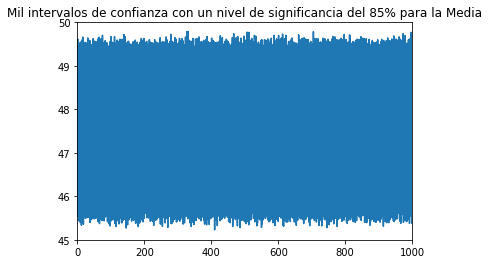

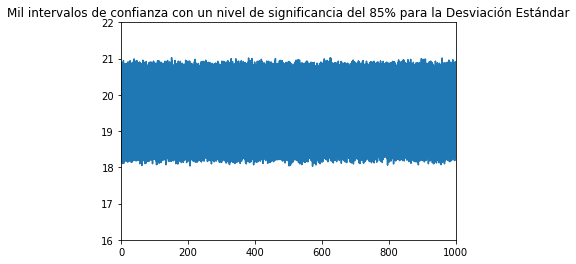

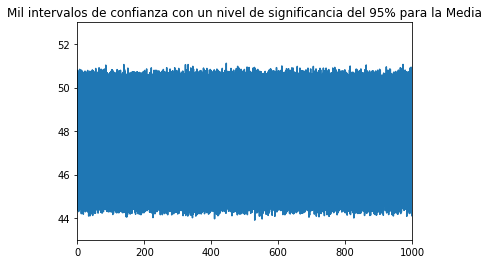

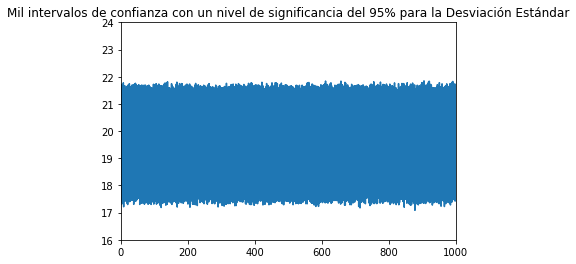

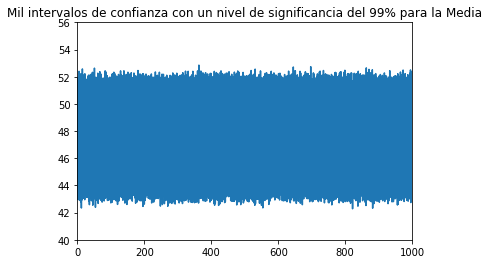

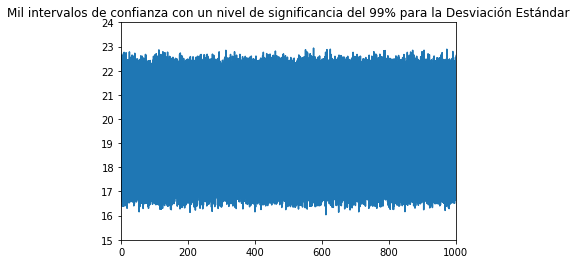

In [74]:
plt.axis([0, 1000, 45, 50])
plt.plot(intervalos85Medias)
plt.title("Mil intervalos de confianza con un nivel de significancia del 85% para la Media")
plt.show()
plt.axis([0, 1000, 16, 22])
plt.plot(intervalos85Desv)
plt.title("Mil intervalos de confianza con un nivel de significancia del 85% para la Desviación Estándar")
plt.show()

plt.axis([0, 1000, 43, 53])
plt.plot(intervalos95Medias)
plt.title("Mil intervalos de confianza con un nivel de significancia del 95% para la Media")
plt.show()
plt.axis([0, 1000, 16, 24])
plt.plot(intervalos95Desv)
plt.title("Mil intervalos de confianza con un nivel de significancia del 95% para la Desviación Estándar")
plt.show()

plt.axis([0, 1000, 40, 56])
plt.plot(intervalos99Medias)
plt.title("Mil intervalos de confianza con un nivel de significancia del 99% para la Media")
plt.show()
plt.axis([0, 1000, 15, 24])
plt.plot(intervalos99Desv)
plt.title("Mil intervalos de confianza con un nivel de significancia del 99% para la Desviación Estándar")
plt.show()


Observando los intervalos junto a su nivel de significancia, con un 85% de significancia la media no nos entrega un intervalo válido (por lo que el 15% de probabilidad de equivocarse se hace presente) pero la desviación estándar es un indicador bastante sólido, con probabilidad de error del 15%. Sin embargo, **con una significancia al 99% podemos asegurar con un 1% de error que la media y la desviación estándar están en los intervalos [ 42.95,51.89 ], [ 16.58, 22.63]** (Tabla 1), respectivamente, lo cual, **si bien es un intervalo más grande** que con un nivel de significancia menor, es bastante sólido. Así se sacrifica exactitud por seguridad, ya que al hacer el intervalo más grande aumenta el rango de posibles respuestas pero puedo asegurar con mayor confianza que el valor estará en ese intervalo. 

Finalmente, asumiento que la muestra es independiente e idénticamente distribuida se comprueba el enunciado empíricamente, ya que los valores teóricos en los casos de mayor confianza (95% y 99%) se encuentran dentro de los intervalos.

## 3. Regresión Lineal (45p)

Uno de los aspectos más importantes de estadística es el análisis de la relación entre dos variables, uno de los modelos más simples para esto es la *Regresión Lineal Simple* donde se estudia una relación lineal entre la variable dependiente e independiente, esto no tiene por qué solamente ser univariado (X e Y) si no que puede ser también multivariado donde se tiene un vector de variables independientes que determinan a una variable de interés.

La regresión lineal simple de mínimos cuadrados es un modelo para representar una relación lineal entre dos variables mediante la ecuación: $Y = a\cdot X + b + \epsilon$. Este será el modelo que se trabajará en esta sección.

Se trabajará con LRData.csv 

>a) Construya un modelo de regresión lineal donde X sea la variable independiente y la columna "Valor" la variable dependiente, luego calcule el MSE (mean standard error) de su modelo 

$$ MSE = \frac{\sum \left(\hat{Y_{i}}- Y_{i}\right)^{2}}{n} $$

$$\hat{Y}: \; prediccion$$

$$Y: \; valor\, verdadero$$

In [4]:
#Carga de datos csv
data = pd.read_csv('LRData.csv')
X = data['x'].values.reshape(-1,1)
y = data['y'].values.reshape(-1,1)
#Conversion a arreglos
X = np.array(X).reshape(-1,1)
y = np.array(y).reshape(-1,1)
random.seed(1)
#Separamos valores para el entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
#Aplicamos el modelo a utilizar, en este caso Regresion Lineal Simple
lr = linear_model.LinearRegression()
#Entrenamos el modelo con los datos de prueba
lr.fit(X_train, y_train)
#Obtencion de datos predichos
Y_pred = lr.predict(X_test)

print('La ecuacion del modelo es:')
print('y = ', lr.coef_, 'x', lr.intercept_)

mse = ((Y_pred - y_test)**2).mean(axis=0)
print('El valor obtenido para el MSE es: ', mse)

La ecuacion del modelo es:
y =  [[2.47821034]] x [-779.95138]
El valor obtenido para el MSE es:  [86442.47348902]


>b) Construya un scatterplot donde grafique tanto los valores predichos por el modelo como los valores originales de la variable independiente en función de X. Al observar el gráfico ¿cree que sería posible mejorar el MSE obtenido en a)?

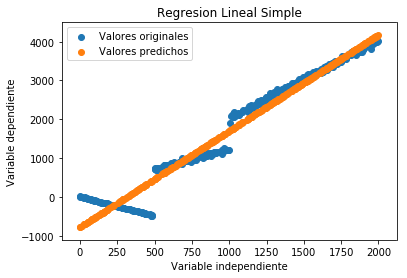

In [5]:
plt.scatter(X_test, y_test, label='Valores originales')
plt.scatter(X_test, Y_pred, label='Valores predichos')
plt.title('Regresion Lineal Simple')
plt.xlabel('Variable independiente')
plt.ylabel('Variable dependiente')
plt.legend()
plt.show()

Como se puede observar en el gráfico, el comportamiento de los valores originales de la variable independiente presenta una gran dispersión. Mientras que los valores predichos tienen un comportamiento lineal, presente dentro de toda la muestra.

Para el MSE, dado lo que se comentó previamente en el inciso a), este se puede mejorar utilizando una funcion discontinua segmentada en los intervalos [0,500], [500, 1000], [1000, 2000], de los cuales se obtendrán 3 MSE, uno para cada intervalo y que presentarán una mejor precisión.

>c) Si en b) respondió que no, saltese esta pregunta, caso contrario, implemente su solución, verifique el MSE disminuye y vuelva a graficar los valores.

La ecuacion del modelo para el primer intervalo es:
y1 =  [[-0.99870653]] x1 [9.47060018]
El valor obtenido para el MSE es:  [49.19483972]
La ecuacion del modelo para el segundo intervalo es:
y2 =  [[1.03217446]] x2 [202.6253962]
El valor obtenido para el MSE es:  [756.19053509]
La ecuacion del modelo para el segundo intervalo es:
y3 =  [[2.00298659]] x3 [24.74866009]
El valor obtenido para el MSE es:  [1850.03645779]


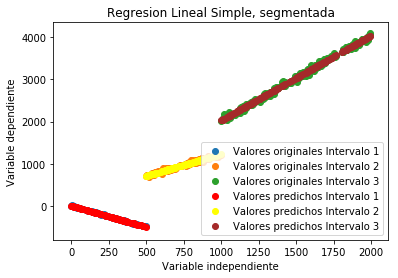

In [6]:
X1 = X[0:500]
y1 = y[0:500]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state=432)
lr1 = linear_model.LinearRegression()
lr1.fit(X1_train, y1_train)
Y1_pred = lr1.predict(X1_test)
mse = ((Y1_pred - y1_test)**2).mean(axis=0)

print('La ecuacion del modelo para el primer intervalo es:')
print('y1 = ', lr1.coef_, 'x1', lr1.intercept_)
print('El valor obtenido para el MSE es: ', mse)

X2 = X[500:1000]
y2 = y[500:1000]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state=432)
lr2 = linear_model.LinearRegression()
lr2.fit(X2_train, y2_train)
Y2_pred = lr2.predict(X2_test)
mse = ((Y2_pred - y2_test)**2).mean(axis=0)

print('La ecuacion del modelo para el segundo intervalo es:')
print('y2 = ', lr2.coef_, 'x2', lr2.intercept_)
print('El valor obtenido para el MSE es: ', mse)

X3 = X[1000:2000]
y3 = y[1000:2000]
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.2, random_state=432)
lr3 = linear_model.LinearRegression()
lr3.fit(X3_train, y3_train)
Y3_pred = lr3.predict(X3_test)
mse = ((Y3_pred - y3_test)**2).mean(axis=0)

print('La ecuacion del modelo para el segundo intervalo es:')
print('y3 = ', lr3.coef_, 'x3', lr3.intercept_)
print('El valor obtenido para el MSE es: ', mse)

plt.scatter(X1_test, y1_test, label='Valores originales Intervalo 1')
plt.scatter(X2_test, y2_test, label='Valores originales Intervalo 2')
plt.scatter(X3_test, y3_test, label='Valores originales Intervalo 3')
plt.scatter(X1_test, Y1_pred, color='red', label='Valores predichos Intervalo 1')
plt.scatter(X2_test, Y2_pred, color='yellow', label='Valores predichos Intervalo 2')
plt.scatter(X3_test, Y3_pred, color='brown', label='Valores predichos Intervalo 3')
plt.title('Regresion Lineal Simple, segmentada')
plt.xlabel('Variable independiente')
plt.ylabel('Variable dependiente')
plt.legend()
plt.show()

Como se puede observar, los MSE obtenidos para cada intervalo son:

Intervalo 1: 49.19483972

Intervalo 2: 756.19053509

Intervalo 3: 1850.03645779

Estos valores, en comparación al primer MSE obtenido en el inciso a), representan de mejor forma los valores para cada intervalo, pudiendo así indicar que la dispersión de los datos es mucho menor.

>d) Utilizando su solución propuesta en c) calcule un intervalo de confianza con un nivel de 90%, 95% y 99% de confiabilidad cuando X = 749

In [7]:
desv_estandar = np.std(y2_test)
largo = len(y2_test)
pendiente = lr2.coef_
intercepto = lr2.intercept_
Y = pendiente*749+intercepto

print('El largo de la muestra es: ', largo)
print('Por lo tanto, el grado de libertad es: ', largo-1)
print('La desviacion de la muestra es: ', desv_estandar)
print('La pendiente de la muestra es: ', pendiente[0][0])
print('El intercepto de la muestra es: ', intercepto[0])
print('El valor de Y es: ', Y[0][0])

lInf1 = Y - (1.2902*desv_estandar)/(largo**0.5)
lSup1 = Y + (1.2902*desv_estandar)/(largo**0.5)
print('El intervalo de confianza con un nivel de 90% de confiabilidad es:')
print('[',lInf1[0][0],', ',lSup1[0][0],']')

lInf2 = Y - (1.6604*desv_estandar)/(largo**0.5)
lSup2 = Y + (1.6604*desv_estandar)/(largo**0.5)
print('El intervalo de confianza con un nivel de 95% de confiabilidad es:')
print('[',lInf2[0][0],', ',lSup2[0][0],']')

lInf3 = Y - (2.3646*desv_estandar)/(largo**0.5)
lSup3 = Y + (2.3646*desv_estandar)/(largo**0.5)
print('El intervalo de confianza con un nivel de 99% de confiabilidad es:')
print('[',lInf3[0][0],', ',lSup3[0][0],']')

El largo de la muestra es:  100
Por lo tanto, el grado de libertad es:  99
La desviacion de la muestra es:  148.25047126914873
La pendiente de la muestra es:  1.0321744552493763
El intercepto de la muestra es:  202.62539620075734
El valor de Y es:  975.7240631825402
El intervalo de confianza con un nivel de 90% de confiabilidad es:
[ 956.5967873793946 ,  994.8513389856859 ]
El intervalo de confianza con un nivel de 95% de confiabilidad es:
[ 951.1085549330107 ,  1000.3395714320698 ]
El intervalo de confianza con un nivel de 99% de confiabilidad es:
[ 940.6687567462374 ,  1010.7793696188431 ]


>e) Comente como se debería implementar la solución dada en c) utilizando el método bootstrap y luego proceda a implementarla, compare ambos modelos resultantes y comente respecto al desempeño de éstos. Puede mencionar otros aspectos también (complejidad, implementación, etc).

Para utilizar el método Bootstrap se pueden tomar varias submuestras aleatorias del mismo tamaño de la muestra original y a cada una de estas aplicarle una regresión lineal con el fin de poder predecir el valor Y_pred para cuando X sea 749. Una vez teniendo estos Y_pred, ordenarlos y obtener a partir de ellos el margen de error del intervalo para luego obtener el IC respectivo.

In [10]:
np.random.seed(432)
lista = []
y_real = y[749]
print('y_real: ', y_real)
i = 0
#Creación de submuestras aleatorias
while (i < 1000):
    listita = np.random.choice(y2_test.reshape(1,-1)[0], size = largo, replace = True)
    lista.append(listita)
    i += 1

#Cargamos los Y_pred en una lista
listaY = []
for i in lista:
    #Procedimiento de entrenamiento similar
    X_train, X_test, y_train, y_test = train_test_split(X2_test, i, test_size = 0.2, random_state=432)
    lr = linear_model.LinearRegression()
    lr.fit(X_train, y_train)
    #Solo que predecimos con un arreglo bidimensional que contiene solamente el valor 749
    Y_pred = lr.predict(np.array(749).reshape(-1,1))
    #Yi = lr.coef_*749+lr.intercept_
    listaY.append(Y_pred)

#Obtenemos el margen de error y ordenamos los datos
listaF = []
for i in listaY:
    listaF.append(abs(y_real - i))
listaF.sort()

#Obtenemos los IC para cada confianza dada
#IC para una confianza del 90%
lInf1 = y_real - listaF[889]
lSup1 = y_real + listaF[99]
print('El IC para una confianza del 90% es:')
print('[',lInf1[0], ', ', lSup1[0], ']')

#IC para una confianza del 95%
lInf2 = y_real - listaF[949]
lSup2 = y_real + listaF[49]
print('El IC para una confianza del 95% es:')
print('[',lInf2[0], ', ', lSup2[0], ']')

#IC para una confianza del 99%
lInf3 = y_real - listaF[989]
lSup3 = y_real + listaF[9]
print('El IC para una confianza del 99% es:')
print('[',lInf3[0], ', ', lSup3[0], ']')

y_real:  [919.02275487]
El IC para una confianza del 90% es:
[ 855.7926789297059 ,  940.4052954563209 ]
El IC para una confianza del 95% es:
[ 850.045666871473 ,  932.8636665502586 ]
El IC para una confianza del 99% es:
[ 839.3893819399664 ,  922.8237653012524 ]


Se puede observar que el método boostrap es un poco mas complejo de implementar debido a que se requiere realizar una cantidad de muestras mayoritariamente grande para poder estimar un intervalo de buena forma.
Por otra parte, el método de regresion lineal simple es mucho menos costoso a nivel computacional que utilizar el método Bootstrap.

## Reglas del Juego y Comentarios 

+ Errores ortográficos, de redacción y oraciones ambiguas descontarán parte de su puntaje.
+ Dudas solamente hasta el día 25 de julio.
+ Dudas **principalmente** vía moodle, evite otro tipo de medio ya que su duda podría ser la de otro.
+ Cada día de atraso descuenta 25 puntos de la nota final con un máximo de dos días de retraso (después es 0).
+ La versión de R que se usará para revisar es 3.5.3
+ La versión de Python que se usará para revisar es 3.6.8
+ Use cualquier librería que estime conveniente, si requiere de instalación explicitarlo en el README (y bien explicitado).
+ Código comentado para facilitar entendimiento.
+ Sea formal y claro con su respuesta, **explique su procedimiento y luego responda.** 
+ Defina bien las secciones de su notebook, el orden siempre es bueno :) [Tips para usar Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)


## Meme 

Si se dividen el trabajo del lab, que no quede así:

<img src="img/trabajo.png">

